In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('NIFTY.csv')
df=data
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0
...,...,...,...,...,...,...,...
4142,2024-07-01,23992.949219,24164.000000,23992.699219,24141.949219,24141.949219,0.0
4143,2024-07-02,24228.750000,24236.349609,24056.400391,24123.849609,24123.849609,0.0
4144,2024-07-03,24291.750000,24309.150391,24207.099609,24286.500000,24286.500000,0.0
4145,2024-07-04,24369.949219,24401.000000,24281.000000,24302.150391,24302.150391,251200.0


In [ ]:
data = data[['Date', 'Close']]
data

,Date,Close
0,2007-09-17,4494.649902
1,2007-09-18,4546.200195
2,2007-09-19,4732.350098
3,2007-09-20,4747.549805
4,2007-09-21,4837.549805
...,...,...
4142,2024-07-01,24141.949219
4143,2024-07-02,24123.849609
4144,2024-07-03,24286.500000
4145,2024-07-04,24302.150391


In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

<ipython-input-170-27440ea654b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


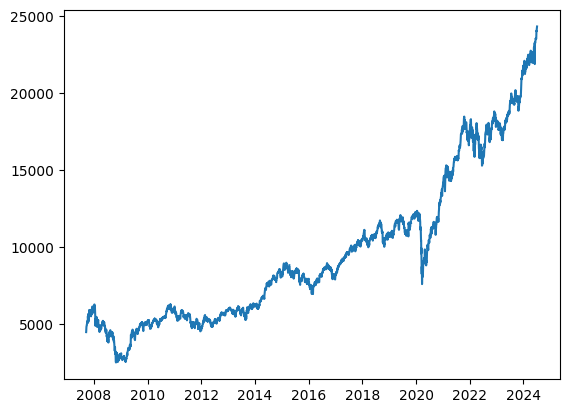

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

plt.plot(data['Date'], data['Close'])

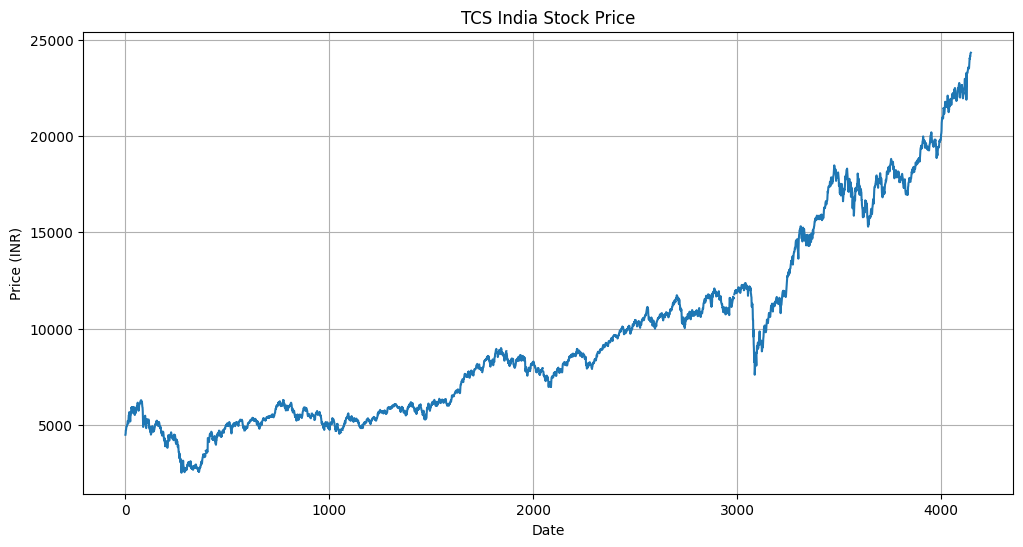

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 84
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),...,Close(t-75),Close(t-76),Close(t-77),Close(t-78),Close(t-79),Close(t-80),Close(t-81),Close(t-82),Close(t-83),Close(t-84)
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-17,5913.200195,5935.750000,6074.250000,6206.799805,6200.100098,6156.950195,6272.000000,6287.850098,6279.100098,6274.299805,...,5021.350098,5000.549805,4940.500000,4938.850098,4932.200195,4837.549805,4747.549805,4732.350098,4546.200195,4494.649902
2008-01-18,5705.299805,5913.200195,5935.750000,6074.250000,6206.799805,6200.100098,6156.950195,6272.000000,6287.850098,6279.100098,...,5068.950195,5021.350098,5000.549805,4940.500000,4938.850098,4932.200195,4837.549805,4747.549805,4732.350098,4546.200195
2008-01-21,5208.799805,5705.299805,5913.200195,5935.750000,6074.250000,6206.799805,6200.100098,6156.950195,6272.000000,6287.850098,...,5210.799805,5068.950195,5021.350098,5000.549805,4940.500000,4938.850098,4932.200195,4837.549805,4747.549805,4732.350098
2008-01-22,4899.299805,5208.799805,5705.299805,5913.200195,5935.750000,6074.250000,6206.799805,6200.100098,6156.950195,6272.000000,...,5208.649902,5210.799805,5068.950195,5021.350098,5000.549805,4940.500000,4938.850098,4932.200195,4837.549805,4747.549805
2008-01-23,5203.399902,4899.299805,5208.799805,5705.299805,5913.200195,5935.750000,6074.250000,6206.799805,6200.100098,6156.950195,...,5185.850098,5208.649902,5210.799805,5068.950195,5021.350098,5000.549805,4940.500000,4938.850098,4932.200195,4837.549805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,24141.949219,24010.599609,24044.500000,23868.800781,23721.300781,23537.849609,23501.099609,23567.000000,23516.000000,23557.900391,...,22474.050781,22356.300781,22405.599609,22338.750000,21982.800781,21951.150391,22198.349609,22122.050781,22212.699219,22217.449219
2024-07-02,24123.849609,24141.949219,24010.599609,24044.500000,23868.800781,23721.300781,23537.849609,23501.099609,23567.000000,23516.000000,...,22493.550781,22474.050781,22356.300781,22405.599609,22338.750000,21982.800781,21951.150391,22198.349609,22122.050781,22212.699219
2024-07-03,24286.500000,24123.849609,24141.949219,24010.599609,24044.500000,23868.800781,23721.300781,23537.849609,23501.099609,23567.000000,...,22332.650391,22493.550781,22474.050781,22356.300781,22405.599609,22338.750000,21982.800781,21951.150391,22198.349609,22122.050781


In [ ]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[ 5913.200195,  5935.75    ,  6074.25    , ...,  4732.350098,
         4546.200195,  4494.649902],
       [ 5705.299805,  5913.200195,  5935.75    , ...,  4747.549805,
         4732.350098,  4546.200195],
       [ 5208.799805,  5705.299805,  5913.200195, ...,  4837.549805,
         4747.549805,  4732.350098],
       ...,
       [24286.5     , 24123.849609, 24141.949219, ..., 21951.150391,
        22198.349609, 22122.050781],
       [24302.150391, 24286.5     , 24123.849609, ..., 21982.800781,
        21951.150391, 22198.349609],
       [24323.849609, 24302.150391, 24286.5     , ..., 22338.75    ,
        21982.800781, 21951.150391]])

In [ ]:
shifted_df_as_np.shape

(2376, 85)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.68907755, -0.68669687, -0.67374312, ..., -0.78905919,
        -0.80678387, -0.8120546 ],
       [-0.70815129, -0.68876775, -0.68647155, ..., -0.78751469,
        -0.78775111, -0.80678387],
       [-0.75370248, -0.70786049, -0.68854393, ..., -0.77836941,
        -0.78619703, -0.78775111],
       ...,
       [ 0.99657338,  0.98362557,  0.98671549, ...,  0.9606144 ,
         0.99804717,  0.99024606],
       [ 0.99800921,  0.99856273,  0.9850521 , ...,  0.96383053,
         0.97277247,  0.99804717],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         0.97600854,  0.97277247]])

In [ ]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((2376, 84), (2376,))

In [ ]:
X = dc(np.flip(X, axis=1))
X

array([[-0.8120546 , -0.80678387, -0.78905919, ..., -0.6592985 ,
        -0.67374312, -0.68669687],
       [-0.80678387, -0.78775111, -0.78751469, ..., -0.67156155,
        -0.68647155, -0.68876775],
       [-0.78775111, -0.78619703, -0.77836941, ..., -0.68437509,
        -0.68854393, -0.70786049],
       ...,
       [ 0.99024606,  0.99804717,  0.9606144 , ...,  0.98784798,
         0.98671549,  0.98362557],
       [ 0.99804717,  0.97277247,  0.96383053, ...,  1.        ,
         0.9850521 ,  0.99856273],
       [ 0.97277247,  0.97600854,  1.        , ...,  0.99832549,
         1.        ,  1.        ]])

In [ ]:
split_index = int(len(X) * 0.70)

split_index

1663

In [ ]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1663, 84), (713, 84), (1663,), (713,))

In [ ]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1663, 84, 1), (713, 84, 1), (1663, 1), (713, 1))

In [ ]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1663, 84, 1]),
 torch.Size([713, 84, 1]),
 torch.Size([1663, 1]),
 torch.Size([713, 1]))

In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [ ]:
train_dataset

In [ ]:
from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([32, 84, 1]) torch.Size([32, 1])


In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 7, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 7, batch_first=True)
  (fc): Linear(in_features=7, out_features=1, bias=True)
)

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.5f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.5f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [ ]:
learning_rate = 0.001
num_epochs = 100
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1

Val Loss: 0.72817
***************************************************

Epoch: 2

Val Loss: 0.46933
***************************************************

Epoch: 3

Val Loss: 0.35021
***************************************************

Epoch: 4

Val Loss: 0.29991
***************************************************

Epoch: 5

Val Loss: 0.26176
***************************************************

Epoch: 6

Val Loss: 0.23317
***************************************************

Epoch: 7

Val Loss: 0.20325
***************************************************

Epoch: 8

Val Loss: 0.17953
***************************************************

Epoch: 9

Val Loss: 0.15955
***************************************************

Epoch: 10

Val Loss: 0.13916
***************************************************

Epoch: 11

Val Loss: 0.12295
***************************************************

Epoch: 12

Val Loss: 0.11214
***************************************************

Epoch: 13

Val Loss: 0.09

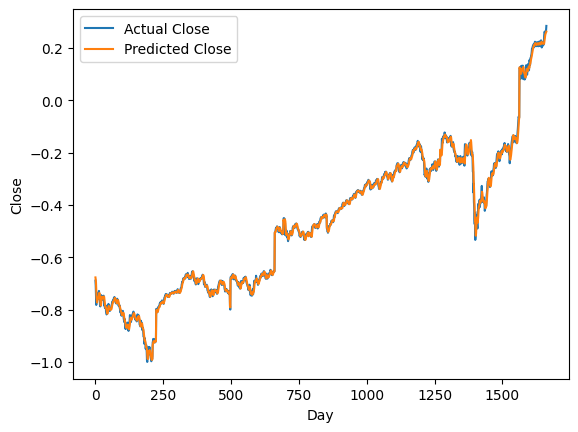

In [ ]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([ 6046.26567142,  5964.6242604 ,  5831.21113463, ...,
       16236.60725216, 16258.30527105, 16292.84681755])

In [ ]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([ 5913.20012455,  5705.29986598,  5208.79997407, ...,
       16282.24988402, 16364.40031947, 16529.09976917])

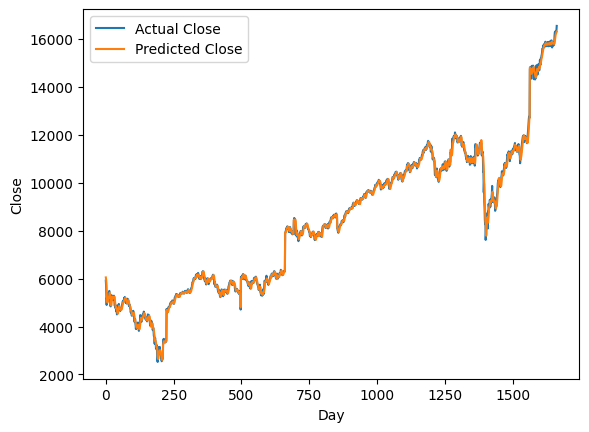

In [ ]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([16359.67746935, 16420.17503869, 16478.81192397, 16510.85609984,
       16503.18077811, 16504.04095467, 16534.01200106, 16560.29806143,
       16581.46074384, 16613.71411673, 16692.65025946, 16802.29353622,
       16874.69389627, 16964.68759578, 17051.57322527, 17128.19715621,
       17180.83034689, 17216.28144565, 17243.92403825, 17259.78792906,
       17275.6180365 , 17317.13714821, 17372.93558075, 17406.82549803,
       17391.80749083, 17413.26967581, 17425.36217313, 17493.4200708 ,
       17552.82682711, 17599.66097243, 17612.74423204, 17613.31335188,
       17592.31828695, 17556.42150758, 17560.70874713, 17591.68744749,
       17580.53113932, 17602.18303091, 17640.3225063 , 17680.83721244,
       17721.6793574 , 17787.02419061, 17871.7197482 , 17963.13819636,
       18021.359936  , 18035.94070844, 18028.2329027 , 18007.97067702,
       17992.81753634, 18007.97002734, 18008.79187278, 17941.31868727,
       17850.94037709, 17830.16490407, 17805.91948917, 17777.05354878,
      

In [ ]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([16563.05075638, 16614.59963082, 16568.84947689, 16450.50016078,
       16496.44911685, 16624.59950826, 16634.6503856 , 16636.90055292,
       16705.19915711, 16931.05072893, 17132.19918616, 17076.25002782,
       17234.15024952, 17323.59951703, 17377.80071083, 17362.09956491,
       17353.50007312, 17369.24994505, 17355.30066176, 17379.99987827,
       17519.44918266, 17629.50013374, 17585.15036545, 17396.90033381,
       17561.99998651, 17546.65031757, 17822.94923107, 17853.1993151 ,
       17855.09962965, 17748.59950563, 17711.30071641, 17618.15054571,
       17532.0507044 , 17691.24996164, 17822.30085025, 17646.00006145,
       17790.34957865, 17895.19919016, 17945.94928281, 17991.94923877,
       18161.7499773 , 18338.550695  , 18477.05081663, 18418.75014085,
       18266.5995888 , 18178.09950404, 18114.90023965, 18125.40037083,
       18268.40050228, 18210.94928334, 17857.25007107, 17671.65040975,
       17929.65043111, 17888.94926676, 17829.19915447, 17916.80073154,
      

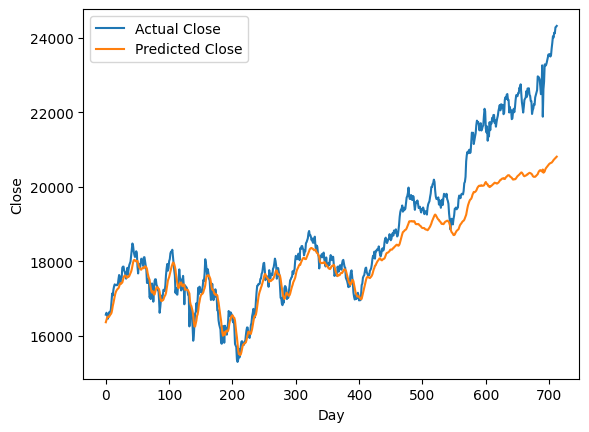

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()
